# **Assignment Week-9**: Wordcloud

**Nama:** Chairunnisa Mahadewi Budi Santosa

**NIM:** 1301213104

**Kelas:** IF-44-DS01

Buatlah visualisasi wordcloud dari kumpulan opini/komentar terkait topik spesifik tertentu berbahasa Indonesia/Inggris.

**Import Library**

In [ ]:
import re
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**Fetch Dataset dari Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Dataset yang digunakan merupakan
[data movie review](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data) dari Kaggle.

In [ ]:
file_path = '/content/drive/MyDrive/3. DATASET/IMDB_Dataset.csv'
df_review = pd.read_csv(file_path)
df_review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Exploratory Data Analysis**

Hanya mengambil 15.000 data dari total keseluruhan 50.000 data (karena sempat terkena IOPub data rate exceeded).

In [ ]:
df_review = df_review.drop('sentiment', axis=1)
df_sample_review = df_review.sample(frac=0.3, random_state=1)
df_sample_review.head()

,review
26247,With No Dead Heroes you get stupid lines like ...
35067,I thought maybe... maybe this could be good. A...
34590,An elite American military team which of cours...
16668,Ridiculous horror film about a wealthy man (Jo...
12196,"Well, if you are one of those Katana's film-nu..."


Remove HTML tag, seperti "< br >" , "< /br >", dan "br" dari data.

In [ ]:
'''
Pattern r"<br\s*/?>" aims to match:
<br>
<br/>
<br >
<br />
</br>
'''
pattern = r"<br\s*/?>|/>\s*<br|(?<=/)>br"
df_sample_review["review"] = df_sample_review["review"].str.replace(pattern," ",regex=True)
print(df_sample_review)

                                                  review
26247  With No Dead Heroes you get stupid lines like ...
35067  I thought maybe... maybe this could be good. A...
34590  An elite American military team which of cours...
16668  Ridiculous horror film about a wealthy man (Jo...
12196  Well, if you are one of those Katana's film-nu...
...                                                  ...
14876  'Succubus', the edited version of 'Necronomico...
42772  Great 1980s Comic Strip comedy set in the Sout...
37248  I remember having a pretty low regard for a ve...
6246   A series of painfully unfunny skits that seem ...
11103  Like many other people, I've heard about "more...

[15000 rows x 1 columns]


Import library untuk stopwords.

In [ ]:
import nltk
from collections import Counter
from nltk.corpus import stopwords

Buat stopwords sendiri berdasarkan kata yang sering muncul, tetapi tidak relevan terhadap review.

In [ ]:
all_words = " ".join(df_sample_review["review"]).split()
word_freq = Counter(all_words)
##
print("50 kata yang paling sering muncul:")
print(word_freq.most_common(50))
##
most_common_words = [word for word, count in word_freq.most_common(50)]

50 kata yang paling sering muncul:
[('the', 168227), ('a', 91183), ('and', 90476), ('of', 84546), ('to', 77990), ('is', 60661), ('in', 50326), ('I', 41181), ('that', 37738), ('this', 33734), ('it', 32191), ('was', 27086), ('as', 24676), ('with', 24616), ('for', 24146), ('The', 24111), ('but', 19734), ('on', 18309), ('movie', 18212), ('are', 17034), ('his', 16184), ('have', 16124), ('film', 16068), ('not', 15706), ('you', 15310), ('be', 15099), ('by', 12592), ('at', 12556), ('one', 12504), ('he', 12444), ('an', 12257), ('who', 11259), ('from', 11136), ('they', 10637), ('like', 10575), ('all', 10403), ('has', 9798), ('just', 9732), ('so', 9615), ('or', 9590), ('about', 9254), ('her', 9143), ('This', 8597), ('out', 8472), ('some', 8334), ('very', 7540), ('more', 7370), ('what', 6971), ('would', 6927), ('It', 6841)]


Menyimpan kata "like" dan menghapusnya dari daftar stopwords.

In [ ]:
word_to_exclude = "like"
most_common_words_filtered = [word for word in most_common_words if word != word_to_exclude]

Melakukan pembersihan data dari stopwords.

In [ ]:
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
custom_stop_words = stop_words.union(most_common_words_filtered)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text, stopwords_set):
    return " ".join([word for word in text.split() if word not in stopwords_set])

In [ ]:
df_sample_review["filtered_review"] = df_sample_review["review"].apply(
    lambda x: remove_stopwords(x, custom_stop_words)
)

print("Original review:")
print(df_sample_review["review"])

print("\nReview yang sudah di-filter:")
print(df_sample_review["filtered_review"])

Original review:
26247    With No Dead Heroes you get stupid lines like ...
35067    I thought maybe... maybe this could be good. A...
34590    An elite American military team which of cours...
16668    Ridiculous horror film about a wealthy man (Jo...
12196    Well, if you are one of those Katana's film-nu...
                               ...                        
14876    'Succubus', the edited version of 'Necronomico...
42772    Great 1980s Comic Strip comedy set in the Sout...
37248    I remember having a pretty low regard for a ve...
6246     A series of painfully unfunny skits that seem ...
11103    Like many other people, I've heard about "more...
Name: review, Length: 15000, dtype: object

Review yang sudah di-filter:
26247    With No Dead Heroes get stupid lines like woef...
35067    thought maybe... maybe could good. An early ap...
34590    An elite American military team course happens...
16668    Ridiculous horror wealthy man (John Carradine)...
12196    Well, Katana's f

**Wordcloud**

In [ ]:
text_review = " ".join(review for review in df_sample_review.filtered_review)
print ("Terdapat {} kata dari kombinasi 15000 review.".format(len(text_review)))

Terdapat 13136434 kata dari kombinasi 15000 review.


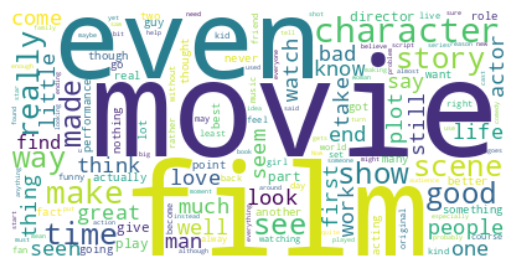

In [ ]:
wordcloud = WordCloud(background_color="white").generate(text_review)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()